# Name of the Project  :  Exploratory Data Analysis on Dataset - Terrorism



### Task  :  1

### Level  :  INTERMEDIATE LEVEL 

### Position : letsgrowmoreintern

### Auther  : Kasetty Purushotham




#### Problem Statement - 

As a security/defense analyst, try to find out the hot zone of terrorism.
You can choose any of the tool of your choice



In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')


C:\Users\abc\AppData\Local\Temp\ipykernel_7596\3456597867.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')


Here's what happens when encoding='ISO-8859-1' is used:

- The CSV file is read byte by byte, and each byte is mapped to its corresponding character in the ISO-8859-1 encoding.
- The resulting character sequence is then interpreted as text by pandas and converted to a dataframe.
- If any byte in the file cannot be mapped to a character in the ISO-8859-1 encoding, an error will occur.

It's worth noting that the choice of encoding can affect how the data is displayed and interpreted. If the encoding is incorrect, it can result in garbled or incorrect data. In this case, ISO-8859-1 is a commonly used encoding scheme for Western European languages, so it should be appropriate if the CSV file contains data in this language.

In summary, encoding='ISO-8859-1' tells pandas that the CSV file should be interpreted as text in the ISO-8859-1 encoding, allowing pandas to read and display the data correctly.

In [7]:
dataset.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
print(dataset.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [12]:
dataset.shape

(181691, 135)

In [14]:
dataset.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [17]:
dataset.drop(dataset.columns[[4,134]],axis=1,inplace=True)
dataset.head()

eventid  iyear  imonth  iday  extended resolution  country  \
0  197000000001   1970       7     2         0        NaN       58   
1  197000000002   1970       0     0         0        NaN      130   
2  197001000001   1970       1     0         0        NaN      160   
3  197001000002   1970       1     0         0        NaN       78   
4  197001000003   1970       1     0         0        NaN      101   

          country_txt  region                   region_txt  ... nreleased  \
0  Dominican Republic       2  Central America & Caribbean  ...       NaN   
1              Mexico       1                North America  ...       NaN   
2         Philippines       5               Southeast Asia  ...       NaN   
3              Greece       8               Western Europe  ...       NaN   
4               Japan       4                    East Asia  ...       NaN   

  addnotes  scite1  scite2  scite3  dbsource INT_LOG INT_IDEO  INT_MISC  \
0      NaN     NaN     NaN     NaN      PGIS       0        0         0   
1      NaN     NaN     NaN     NaN      PGIS       0        1         1   
2      NaN     NaN     NaN     NaN      PGIS      -9       -9         1   
3      NaN     NaN     NaN     NaN      PGIS      -9       -9         1   
4      NaN     NaN     NaN     NaN      PGIS      -9       -9         1   

   INT_ANY  
0        0  
1        1  
2        1  
3        1  
4        1  

[5 rows x 133 columns]

In [28]:
dataset["scite3"].isnull().sum()

138175

In [30]:
dataset["addnotes"].isnull().sum()

153402

In [31]:
dataset["nreleased"].isnull().sum()

171291

In [32]:
dataset["scite1"].isnull().sum()

66191

In [33]:
dataset["scite2"].isnull().sum()

104758

In [34]:
dataset["resolution"].fillna("NO Resolution",inplace=True)
dataset["nreleased"].fillna("NOT Known",inplace=True)
dataset["addnotes"].fillna("NO addnotes",inplace=True)
dataset["scite1"].fillna("NO scitation",inplace=True)
dataset["scite2"].fillna("NO scitation",inplace=True)
dataset["scite3"].fillna("NO scitation",inplace=True)
dataset.head()

eventid  iyear  imonth  iday  extended     resolution  country  \
0  197000000001   1970       7     2         0  NO Resolution       58   
1  197000000002   1970       0     0         0  NO Resolution      130   
2  197001000001   1970       1     0         0  NO Resolution      160   
3  197001000002   1970       1     0         0  NO Resolution       78   
4  197001000003   1970       1     0         0  NO Resolution      101   

          country_txt  region                   region_txt  ...  nreleased  \
0  Dominican Republic       2  Central America & Caribbean  ...  NOT Known   
1              Mexico       1                North America  ...  NOT Known   
2         Philippines       5               Southeast Asia  ...  NOT Known   
3              Greece       8               Western Europe  ...  NOT Known   
4               Japan       4                    East Asia  ...  NOT Known   

      addnotes        scite1        scite2        scite3  dbsource INT_LOG  \
0  NO addnotes  NO scitation  NO scitation  NO scitation      PGIS       0   
1  NO addnotes  NO scitation  NO scitation  NO scitation      PGIS       0   
2  NO addnotes  NO scitation  NO scitation  NO scitation      PGIS      -9   
3  NO addnotes  NO scitation  NO scitation  NO scitation      PGIS      -9   
4  NO addnotes  NO scitation  NO scitation  NO scitation      PGIS      -9   

  INT_IDEO  INT_MISC  INT_ANY  
0        0         0        0  
1        1         1        1  
2       -9         1        1  
3       -9         1        1  
4       -9         1        1  

[5 rows x 133 columns]

In [35]:
dataset["addnotes"].isnull().sum()

0

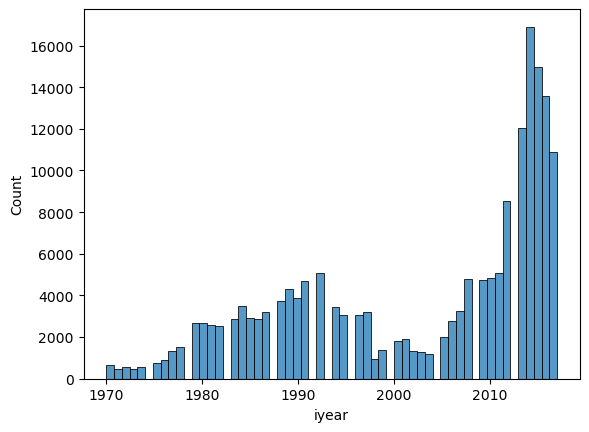

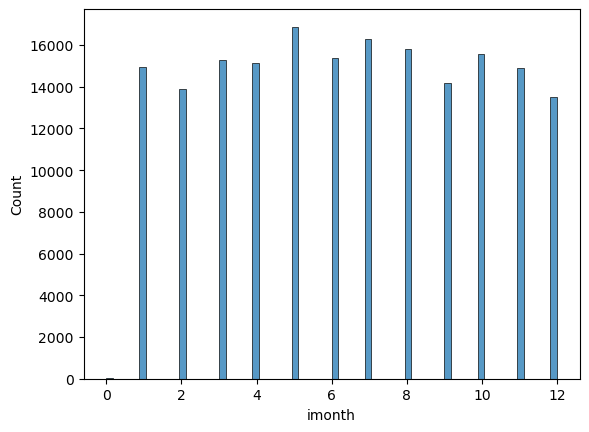

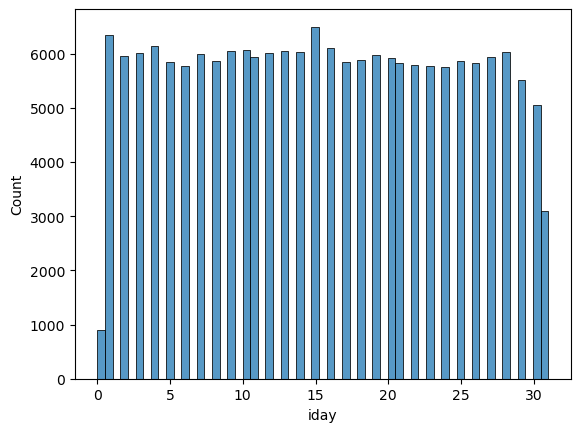

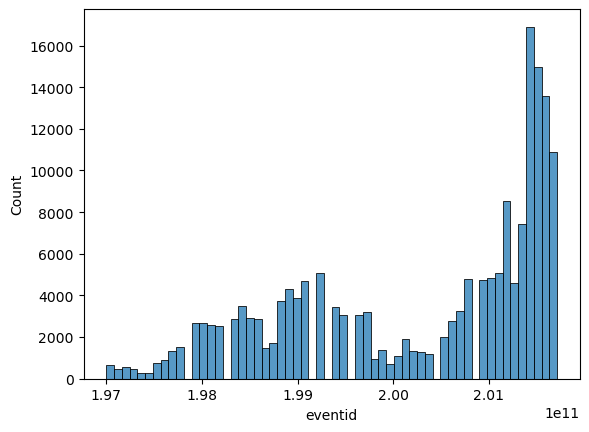

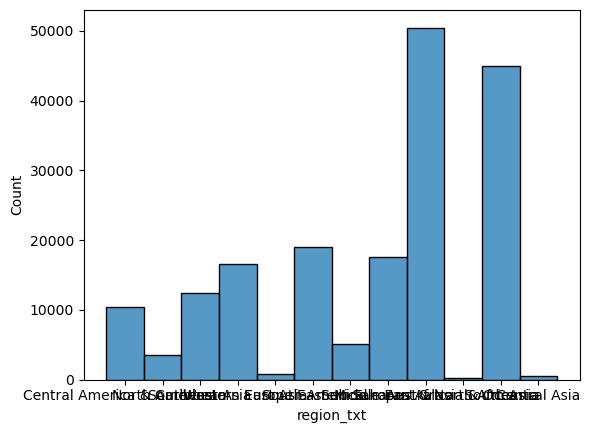

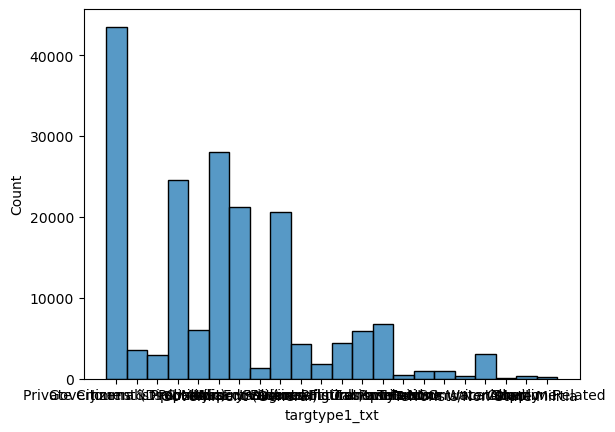

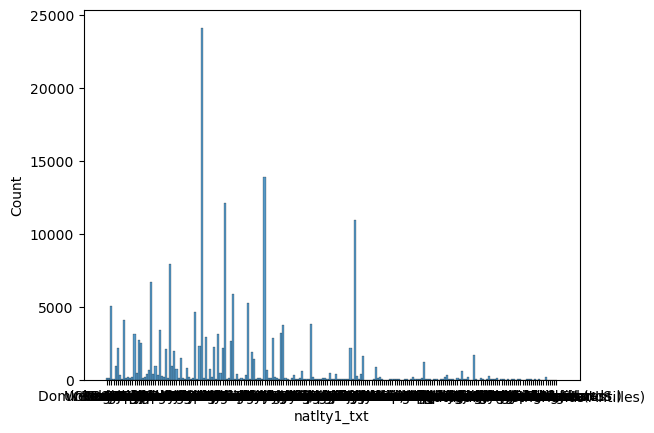

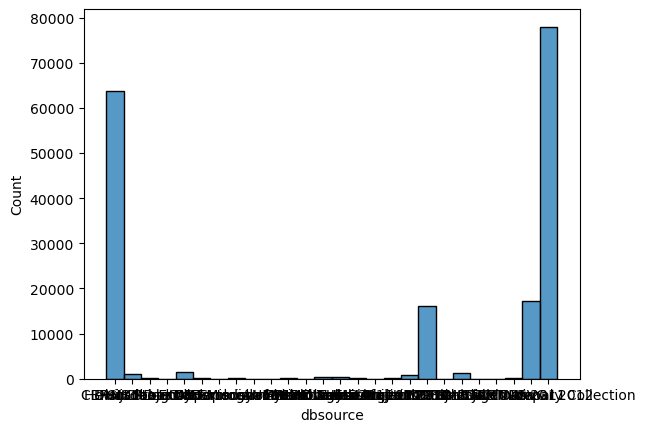

In [37]:
import seaborn as sns
arr=['iyear','imonth','iday','eventid','region_txt','targtype1_txt','natlty1_txt','dbsource']
for i in range(0,len(arr)):
    sns.histplot(x=arr[i], data=dataset)
    plt.show()

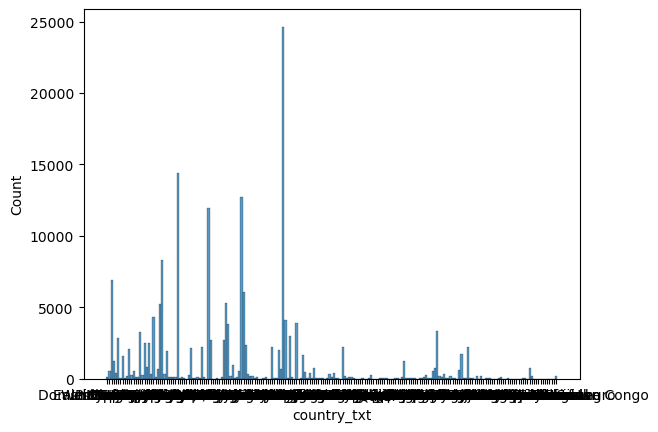

In [39]:
sns.histplot(x='country_txt', data=dataset)
plt.show()

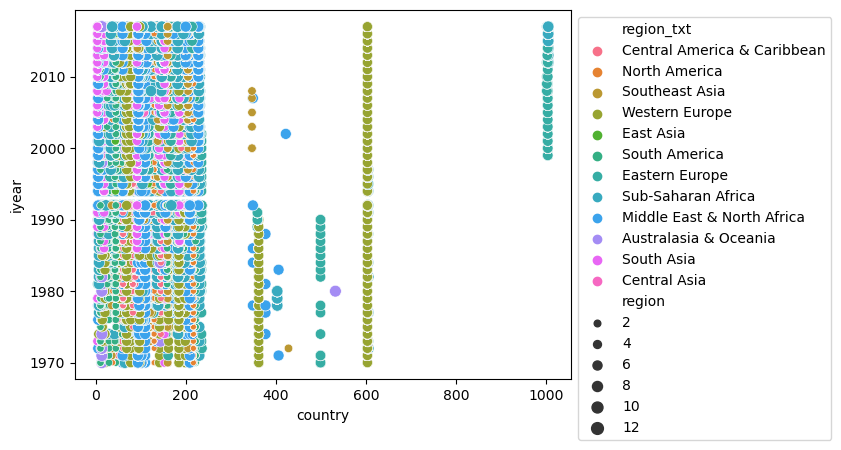

In [53]:
sns.scatterplot( x="country", y='iyear', data=dataset,
                hue='region_txt', size='region')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

In [55]:
corrmat = dataset.corr()
corrmat

eventid     iyear    imonth      iday  extended   country  \
eventid         1.000000  0.999996  0.002706  0.018336  0.091761 -0.135039   
iyear           0.999996  1.000000  0.000139  0.018254  0.091754 -0.135023   
imonth          0.002706  0.000139  1.000000  0.005497 -0.000468 -0.006305   
iday            0.018336  0.018254  0.005497  1.000000 -0.004700  0.003468   
extended        0.091761  0.091754 -0.000468 -0.004700  1.000000 -0.020466   
...                  ...       ...       ...       ...       ...       ...   
hostkidoutcome  0.256113  0.256092  0.011295 -0.006706  0.233293  0.012434   
INT_LOG        -0.143600 -0.143601 -0.002302 -0.001540  0.071768  0.069904   
INT_IDEO       -0.133252 -0.133253 -0.002034 -0.001621  0.075147  0.067564   
INT_MISC       -0.077852 -0.077847 -0.002554 -0.002027  0.027335  0.207281   
INT_ANY        -0.175605 -0.175596 -0.006336 -0.001199  0.080767  0.153118   

                  region  latitude  longitude  specificity  ...    ransom  \
eventid         0.401371  0.166886   0.003907     0.030641  ... -0.241986   
iyear           0.401384  0.166933   0.003917     0.030626  ... -0.241764   
imonth         -0.002999 -0.015978  -0.003880     0.003621  ... -0.070199   
iday            0.009710  0.003423  -0.002285    -0.006991  ...  0.001206   
extended        0.038389 -0.024749   0.000523     0.057897  ... -0.166868   
...                  ...       ...        ...          ...  ...       ...   
hostkidoutcome  0.200913  0.059493   0.093693     0.027030  ... -0.141912   
INT_LOG        -0.082584 -0.099827   0.002272     0.073022  ...  0.007484   
INT_IDEO       -0.071917 -0.094470   0.002268     0.071333  ...  0.008022   
INT_MISC        0.043139  0.097652   0.000371    -0.019197  ...  0.009532   
INT_ANY        -0.047900 -0.041530   0.002497     0.061389  ...  0.016276   

                ransomamt  ransomamtus  ransompaid  ransompaidus  \
eventid         -0.009990    -0.018001   -0.014094     -0.165422   
iyear           -0.009984    -0.018216   -0.014238     -0.165375   
imonth          -0.000710     0.046989    0.058878     -0.016597   
iday             0.012755    -0.010502    0.003148     -0.006581   
extended        -0.008114     0.028177    0.001966      0.009367   
...                   ...          ...         ...           ...   
hostkidoutcome   0.001441     0.060668   -0.054148     -0.054443   
INT_LOG          0.035821     0.031079    0.007029     -0.045504   
INT_IDEO         0.039053     0.041983    0.013162     -0.039844   
INT_MISC         0.023815     0.125162    0.037227      0.129274   
INT_ANY          0.028054     0.053484    0.007275      0.056438   

                hostkidoutcome   INT_LOG  INT_IDEO  INT_MISC   INT_ANY  
eventid               0.256113 -0.143600 -0.133252 -0.077852 -0.175605  
iyear                 0.256092 -0.143601 -0.133253 -0.077847 -0.175596  
imonth                0.011295 -0.002302 -0.002034 -0.002554 -0.006336  
iday                 -0.006706 -0.001540 -0.001621 -0.002027 -0.001199  
extended              0.233293  0.071768  0.075147  0.027335  0.080767  
...                        ...       ...       ...       ...       ...  
hostkidoutcome        1.000000 -0.015442 -0.016234 -0.119776 -0.061946  
INT_LOG              -0.015442  1.000000  0.996211  0.052537  0.891051  
INT_IDEO             -0.016234  0.996211  1.000000  0.082014  0.893811  
INT_MISC             -0.119776  0.052537  0.082014  1.000000  0.252193  
INT_ANY              -0.061946  0.891051  0.893811  0.252193  1.000000  

[76 rows x 76 columns]

<AxesSubplot:>

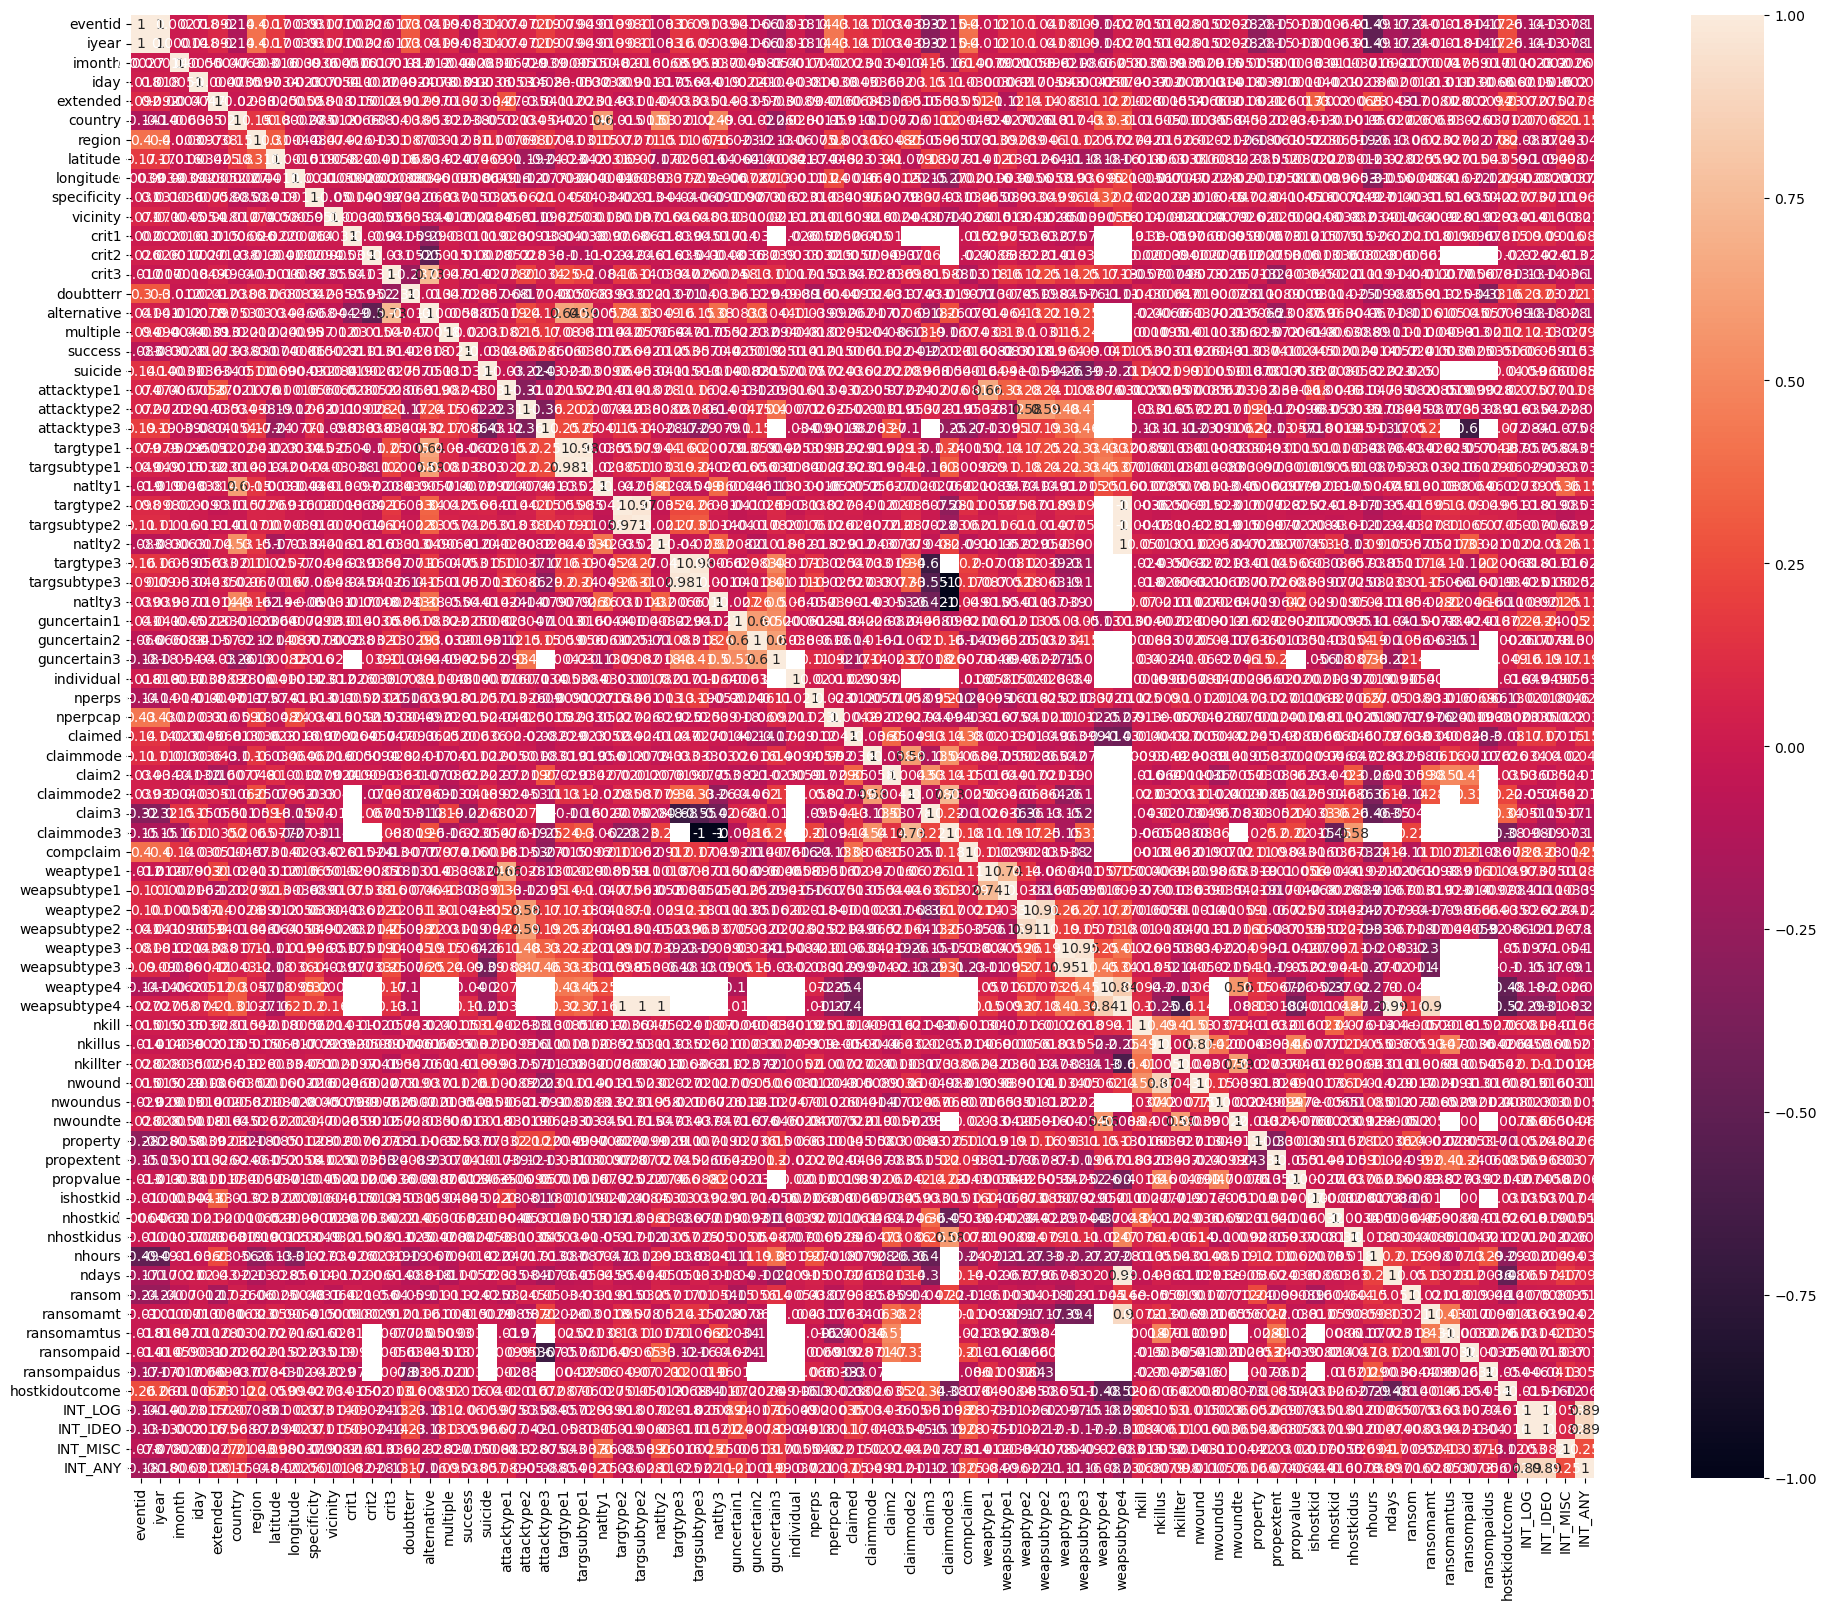

In [57]:
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})
     

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='iyear'>

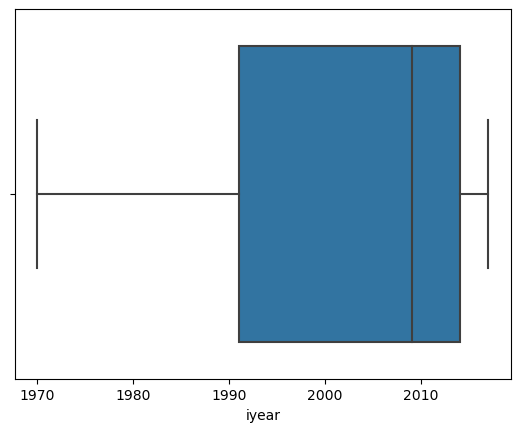

In [61]:
arr=['iyear','imonth','iday']
sns.boxplot(dataset[arr[0]])


C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='imonth'>

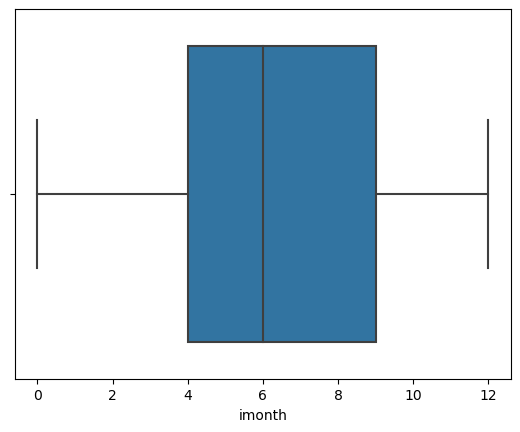

In [62]:
sns.boxplot(dataset[arr[1]])


C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='iday'>

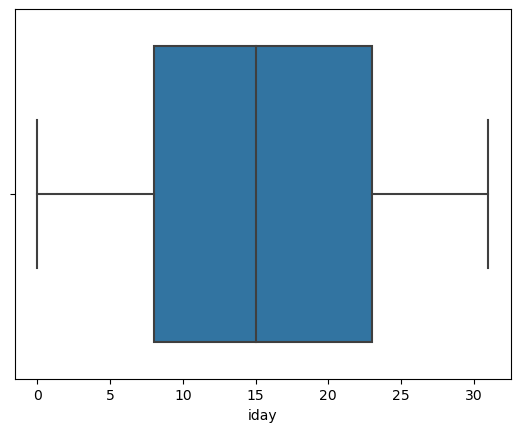

In [63]:
sns.boxplot(dataset[arr[2]])

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


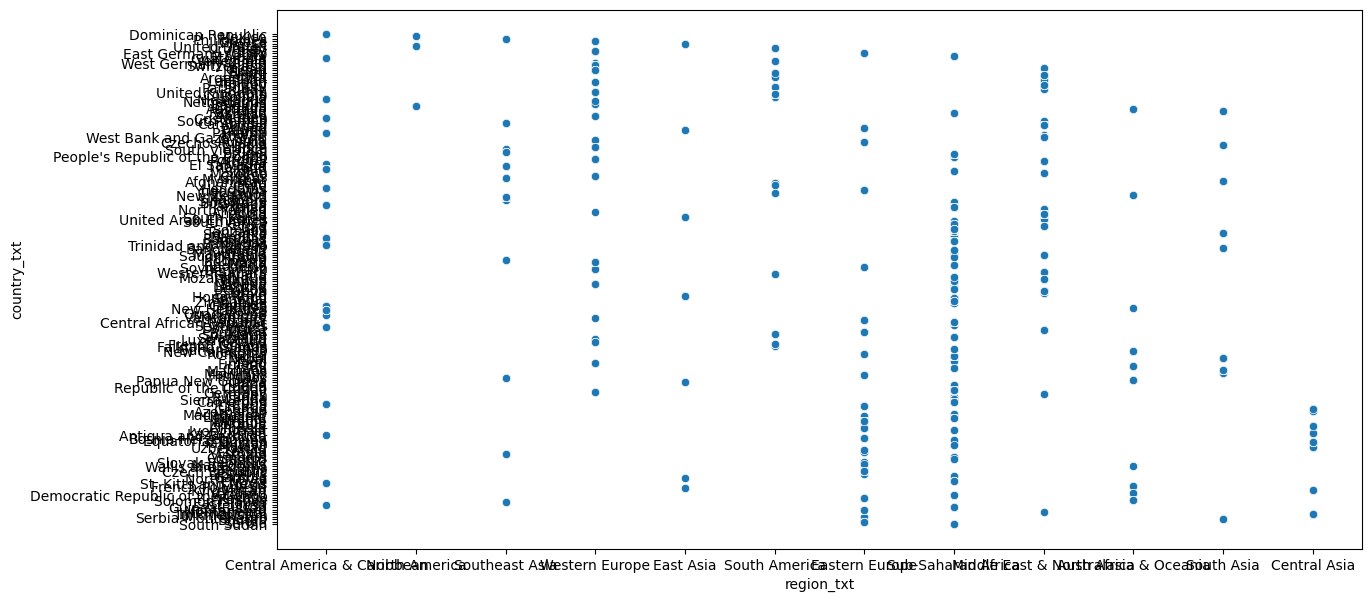

In [72]:
plt.figure(figsize=(14,7))
sns.scatterplot(dataset['region_txt'],dataset['country_txt'])

plt.show()